In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

# Q1. Company Data

In [2]:
com=pd.read_csv('Company_Data.csv')

In [3]:
com1=com.copy()

In [4]:
com1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
com1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
com1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
com1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## outlier check

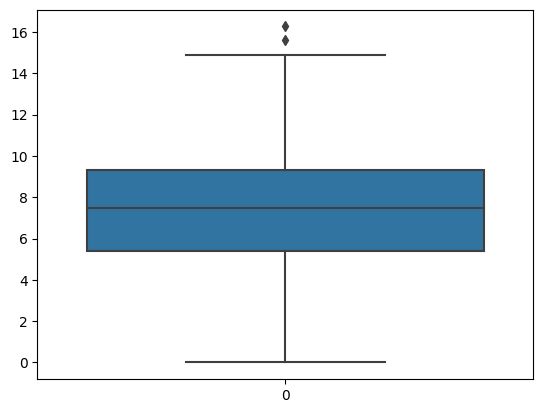

In [8]:
ax=sns.boxplot(com1['Sales'])

## The data has 2 outlier instances

In [9]:
plt.rcParams["figure.figsize"]=9,5

skew: 0.18556036318721578
kurtosis: -0.08087736743346197


C:\Users\91832\AppData\Local\Temp\ipykernel_17032\2286652194.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(com1['Sales'],shade=True,color='teal')


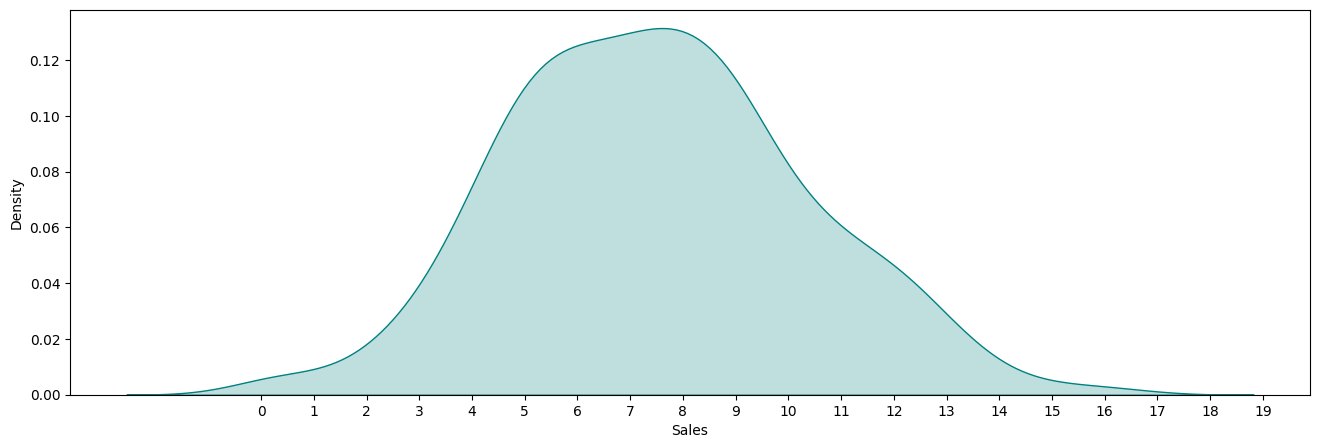

In [10]:
plt.figure(figsize=(16,5))
print("skew: {}".format(com1['Sales'].skew()))
print("kurtosis: {}".format(com1['Sales'].kurtosis()))
ax=sns.kdeplot(com1['Sales'],shade=True,color='teal')
plt.xticks([i for i in range(0,20,1)])
plt.show()

## (1).The data is Skwed on the right
## (2).The data has negative Kurtosis

In [11]:
ocol=com1.select_dtypes(include='object').columns.tolist()

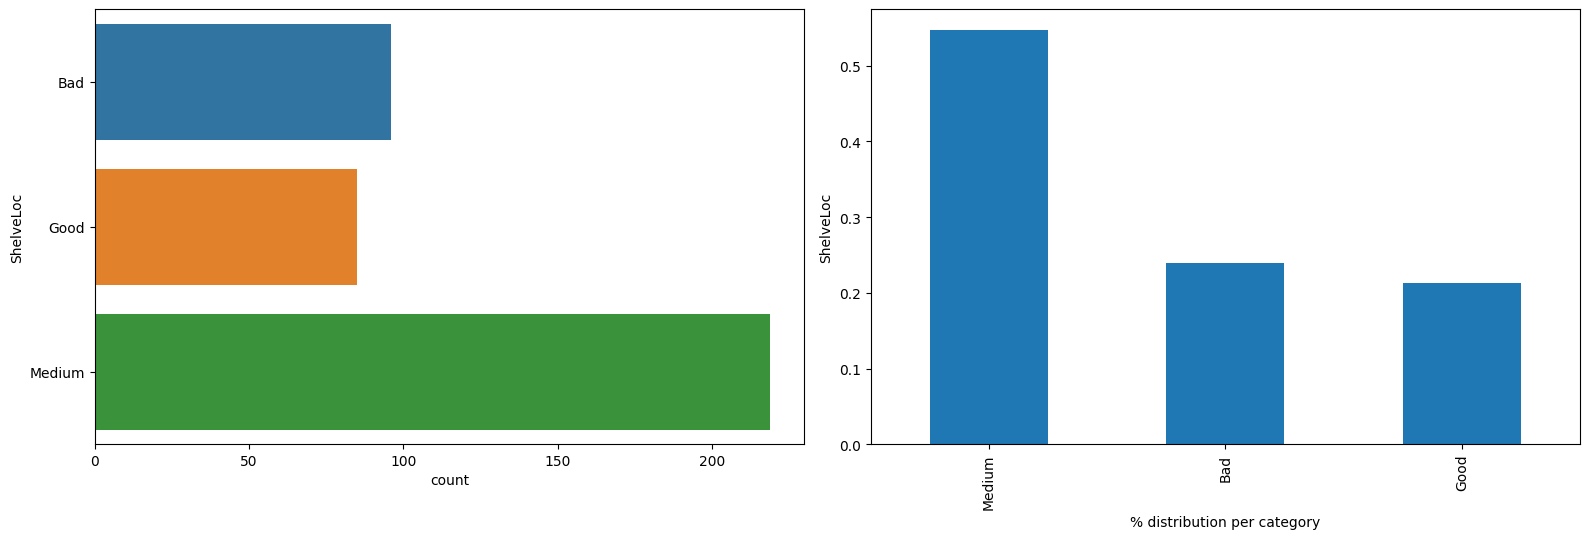

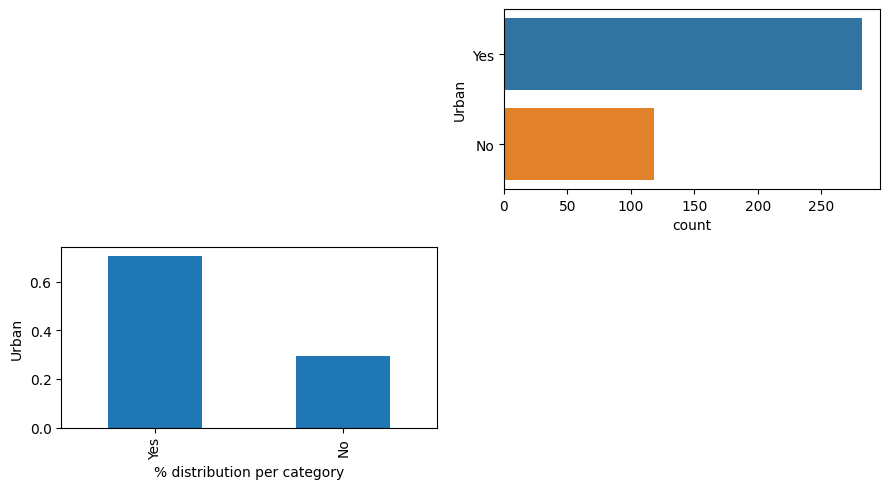

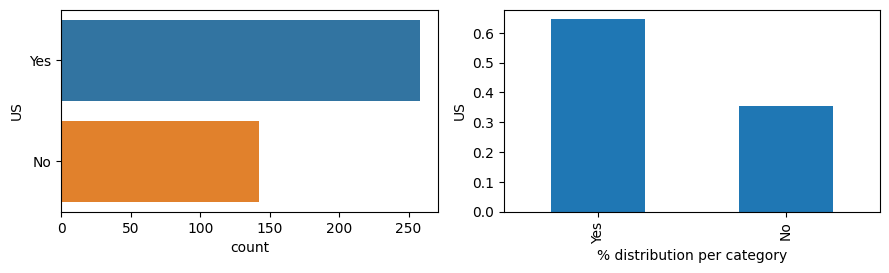

In [12]:
plt.figure(figsize=(16,10))
for i,col in enumerate(ocol,1):
    plt.subplot(2,2,i)
    sns.countplot(data=com1,y=col)
    plt.subplot(2,2,i+1)
    com1[col].value_counts(normalize=True).plot.bar()
    plt.xlabel('% distribution per category')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [13]:
ncol=com1.select_dtypes(exclude='object').columns.tolist()

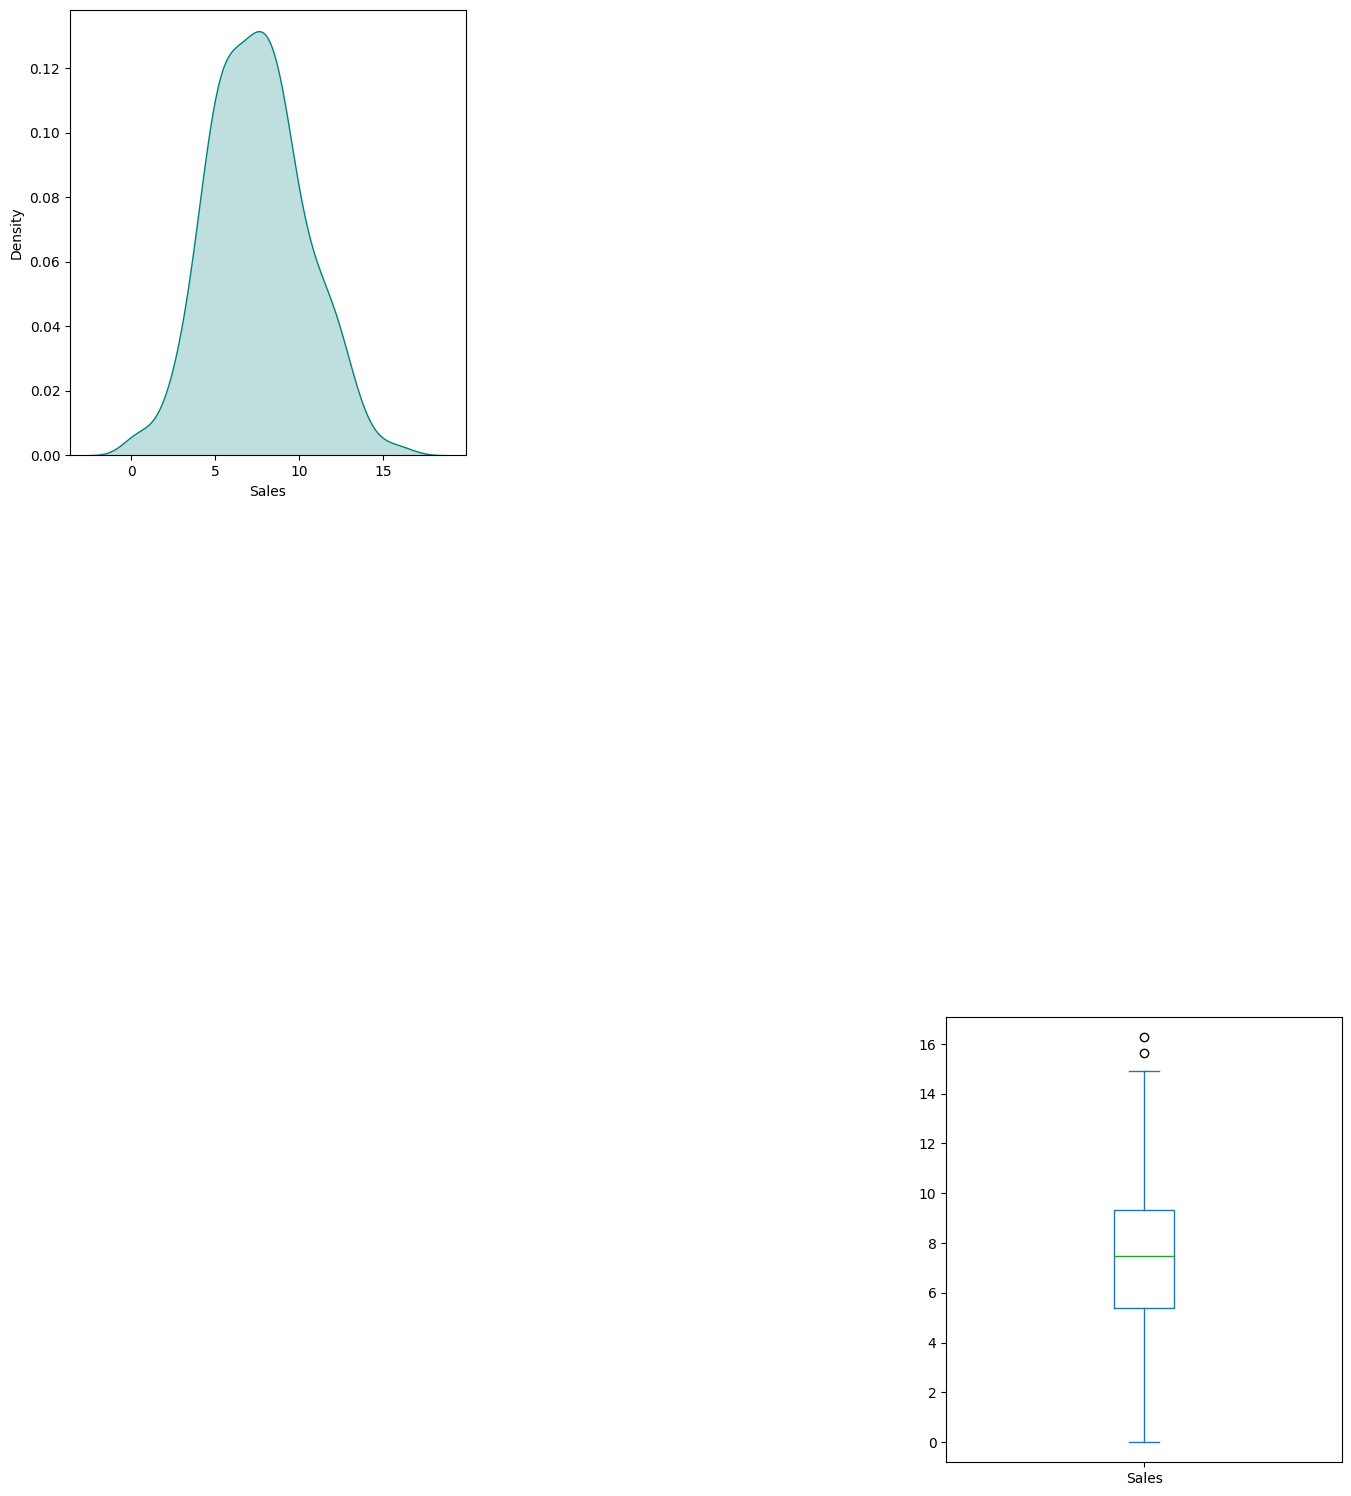

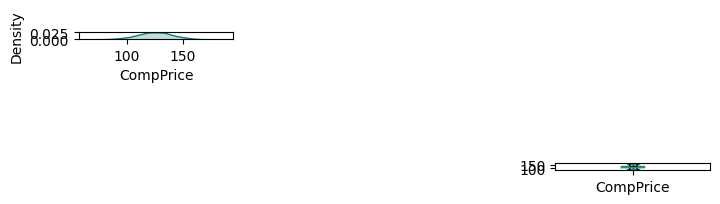

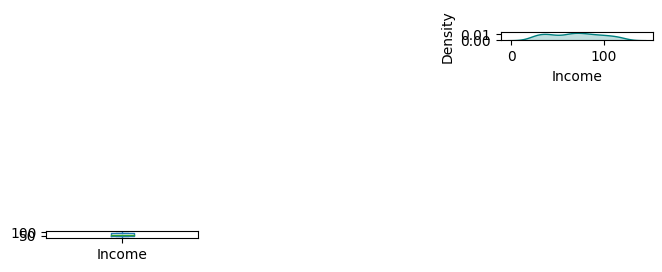

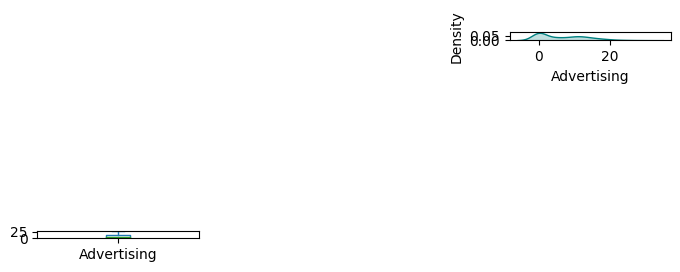

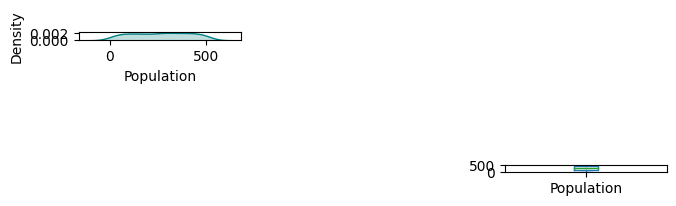

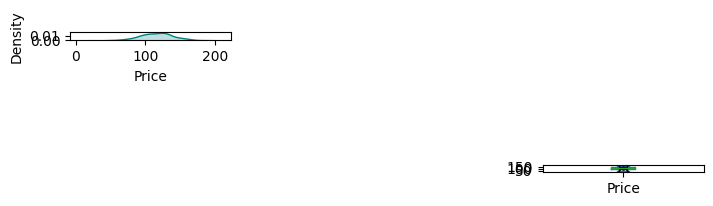

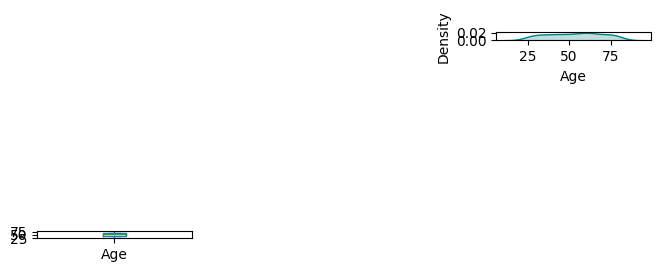

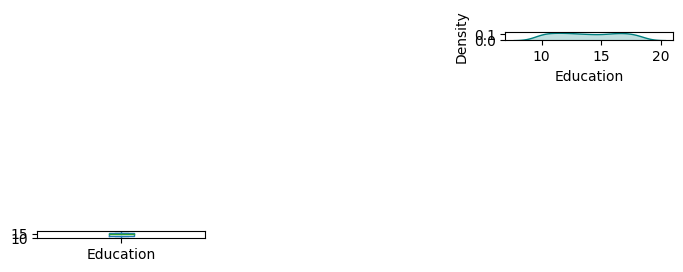

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(ncol,1):
    plt.subplot(8,4,i)
    sns.kdeplot(com[col], color='teal', fill=True)
    plt.subplot(8,4,i+10)
    com[col].plot.box()
    plt.tight_layout()
    plt.show()
    num_data=com[ncol]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [15]:
corr=com1.corr()

In [16]:
com1=pd.get_dummies(com1,columns=['ShelveLoc','Urban','US'])

<AxesSubplot:>

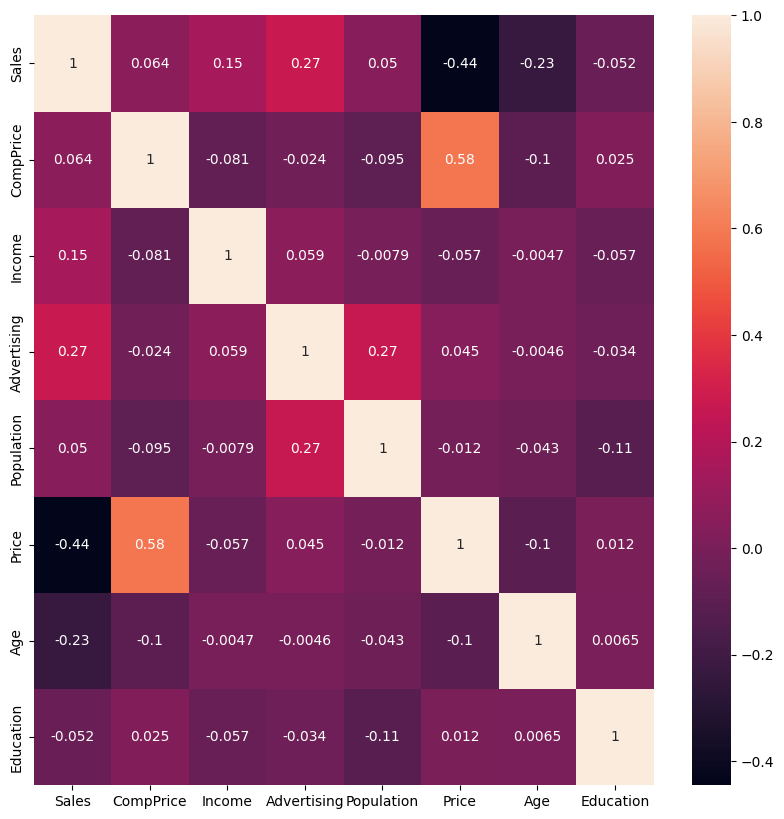

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## Random Forest Model

## Since the target variable is continious, we create a class of the value based on the mean
## <= 7.49 == "Small" and > 7.49 == "large"

In [18]:
com1['sales']='small'
com1.loc[com1['Sales']>7.49,"sales"]="large"
com1.drop(['Sales'],axis=1,inplace=True)

In [19]:
X=com1.iloc[:,0:14]
y=com1.iloc[:,14]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [21]:
y_train.value_counts()

large    169
small    151
Name: sales, dtype: int64

In [22]:
model=RF(n_jobs=4,n_estimators = 150,oob_score=True,criterion='entropy')
model.fit(x_train,y_train)
model.oob_score_

0.8

In [23]:
prdtrn=model.predict(x_train)

In [24]:
accuracy_score(y_train,prdtrn)

1.0

In [25]:
confusion_matrix(y_train,prdtrn)

array([[169,   0],
       [  0, 151]], dtype=int64)

In [26]:
prdtet=model.predict(x_test)

In [27]:
accuracy_score(y_test,prdtet)

0.7875

In [28]:
confusion_matrix(y_test,prdtet)

array([[26,  4],
       [13, 37]], dtype=int64)

In [29]:
dft1=pd.DataFrame({'Actual':y_test,'Predicted':prdtet})
dft1

,Actual,Predicted
43,small,small
32,small,large
74,small,small
379,small,small
246,small,large
...,...,...
283,small,small
261,small,small
356,small,small
269,small,small


In [30]:
cols=list(com1.columns)
cols

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes',
 'sales']

In [31]:
predictors=cols[0:14]
target=cols[14]

In [32]:
tree1=model.estimators_[20]

In [33]:
dot_data=StringIO()

In [34]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [35]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

In [36]:
graph.write_png('company_full.png')

True

## conclusion:- 
## Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%

## As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not

In [37]:
rf_sma=RF(n_estimators=10,max_depth=3)

In [38]:
rf_sma.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [39]:
tree_sma=rf_sma.estimators_[5]

In [40]:
export_graphviz(tree_sma, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [41]:
graph_sma=pydotplus.graph_from_dot_data(dot_data.getvalue())

In [42]:
graph.write_png('company_small.png')

True

In [43]:
img = mpimg.imread("C:/Users/91832/Desktop/jupyter/assignments/assignment 15 Random Forests/company_small.png") 


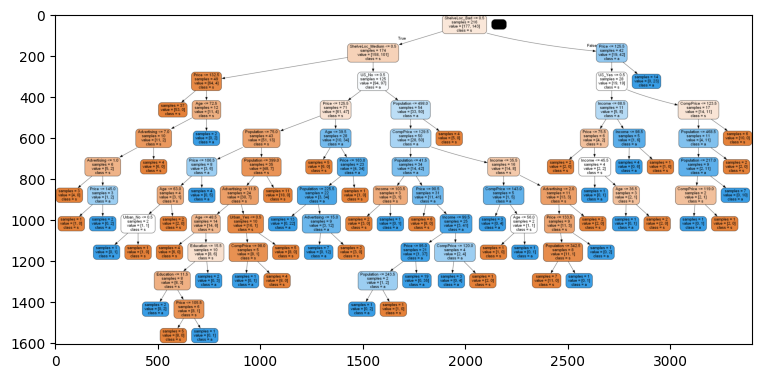

In [44]:
plt.imshow(img)

In [45]:
model.feature_importances_

array([0.12154642, 0.09621965, 0.09869437, 0.08877082, 0.24917227,
       0.11750387, 0.0579196 , 0.03418679, 0.06650349, 0.02057344,
       0.01227422, 0.01214468, 0.01279918, 0.0116912 ])

In [46]:
fi=pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.249172
0,CompPrice,0.121546
5,Age,0.117504
2,Advertising,0.098694
1,Income,0.096220
3,Population,0.088771
8,ShelveLoc_Good,0.066503
6,Education,0.057920
7,ShelveLoc_Bad,0.034187
9,ShelveLoc_Medium,0.020573


## As seen in the above table Price is most important feature

# Q2. Fraud check

In [47]:
fr=pd.read_csv('Fraud_check.csv')

In [48]:
fr1=fr.copy()

In [49]:
fr1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [50]:
fr1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [51]:
fr1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [52]:
fr1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## outlier check

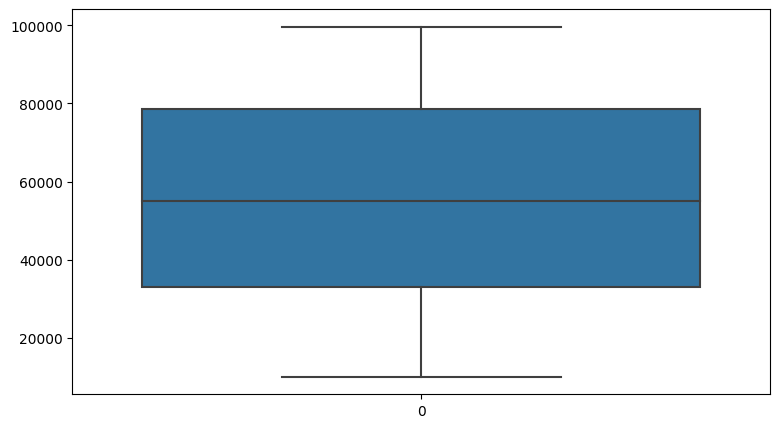

In [53]:
ab=sns.boxplot(fr1['Taxable.Income'])

## There are no outliers in the data

In [54]:
plt.rcParams["figure.figsize"]=9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


C:\Users\91832\AppData\Local\Temp\ipykernel_17032\2908407797.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ab = sns.kdeplot(fr1['Taxable.Income'],shade=True,color='teal')


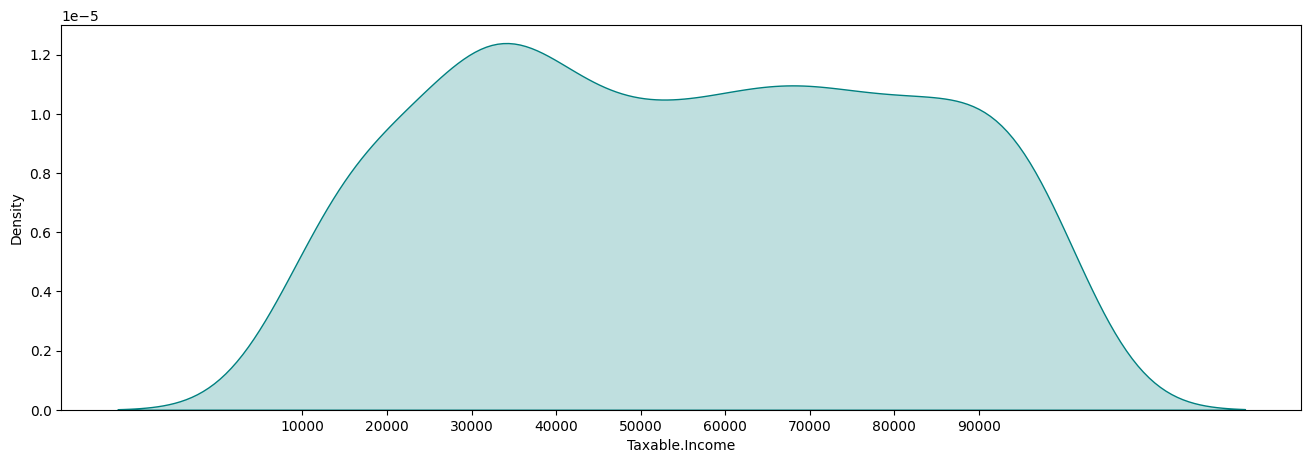

In [55]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(fr1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(fr1['Taxable.Income'].kurtosis()))
ab = sns.kdeplot(fr1['Taxable.Income'],shade=True,color='teal')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

## (1).The data is Skwed on the right
## (2). The data has negative Kurtosis

In [56]:
ocol=fr1.select_dtypes(include='object').columns.tolist()

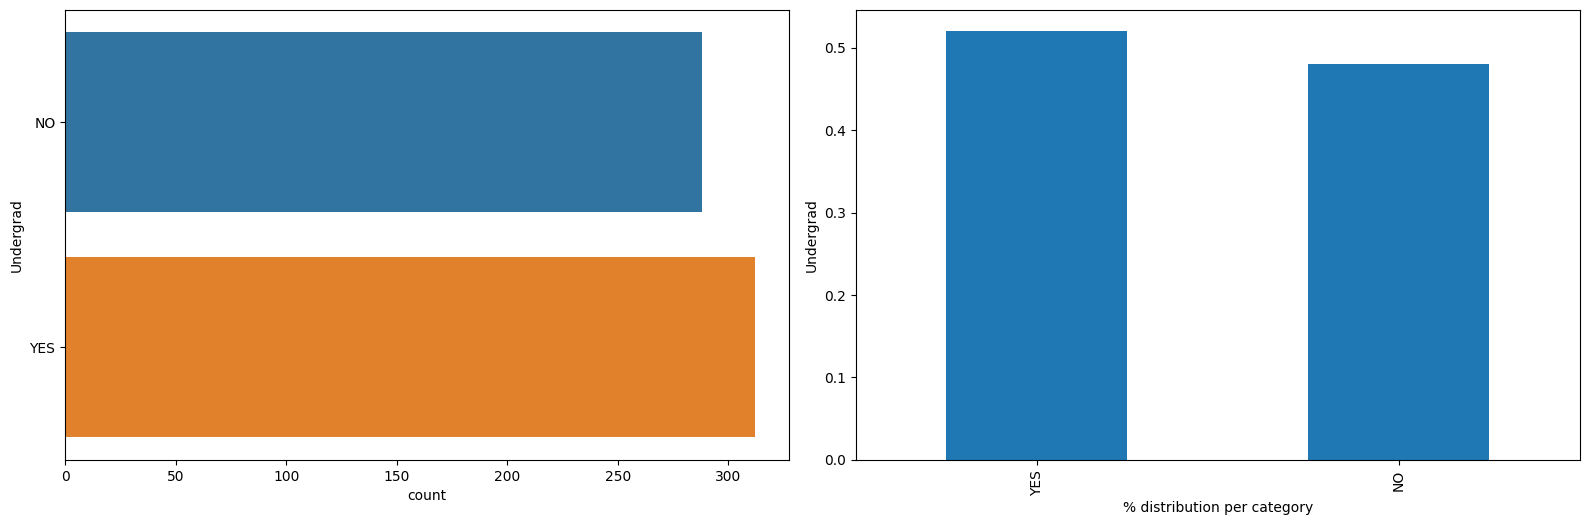

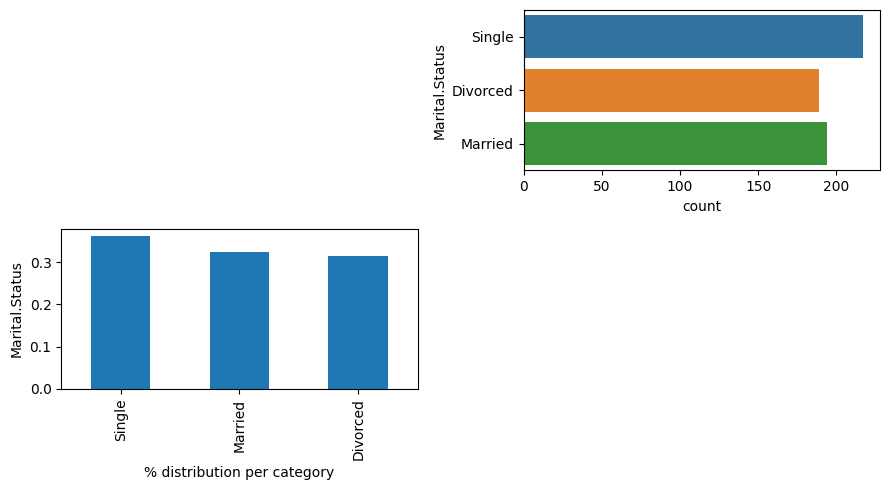

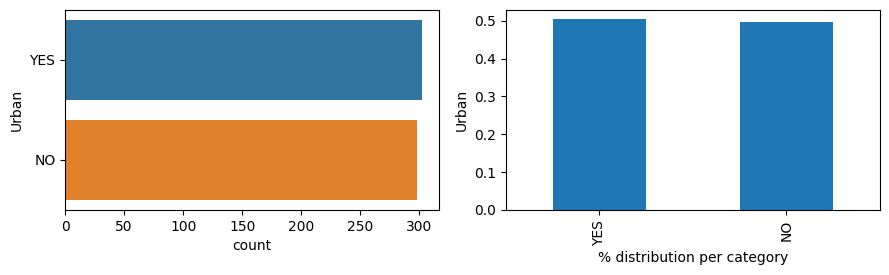

In [57]:
plt.figure(figsize=(16,10))
for i,col in enumerate(ocol,1):
    plt.subplot(2,2,i)
    sns.countplot(data=fr1,y=col)
    plt.subplot(2,2,i+1)
    fr1[col].value_counts(normalize=True).plot.bar()
    plt.xlabel('% distribution per category')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show() 

In [58]:
ncol=fr1.select_dtypes(exclude='object').columns.tolist()

C:\Users\91832\AppData\Local\Temp\ipykernel_17032\2991690886.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fr[col],color='teal',shade=True)


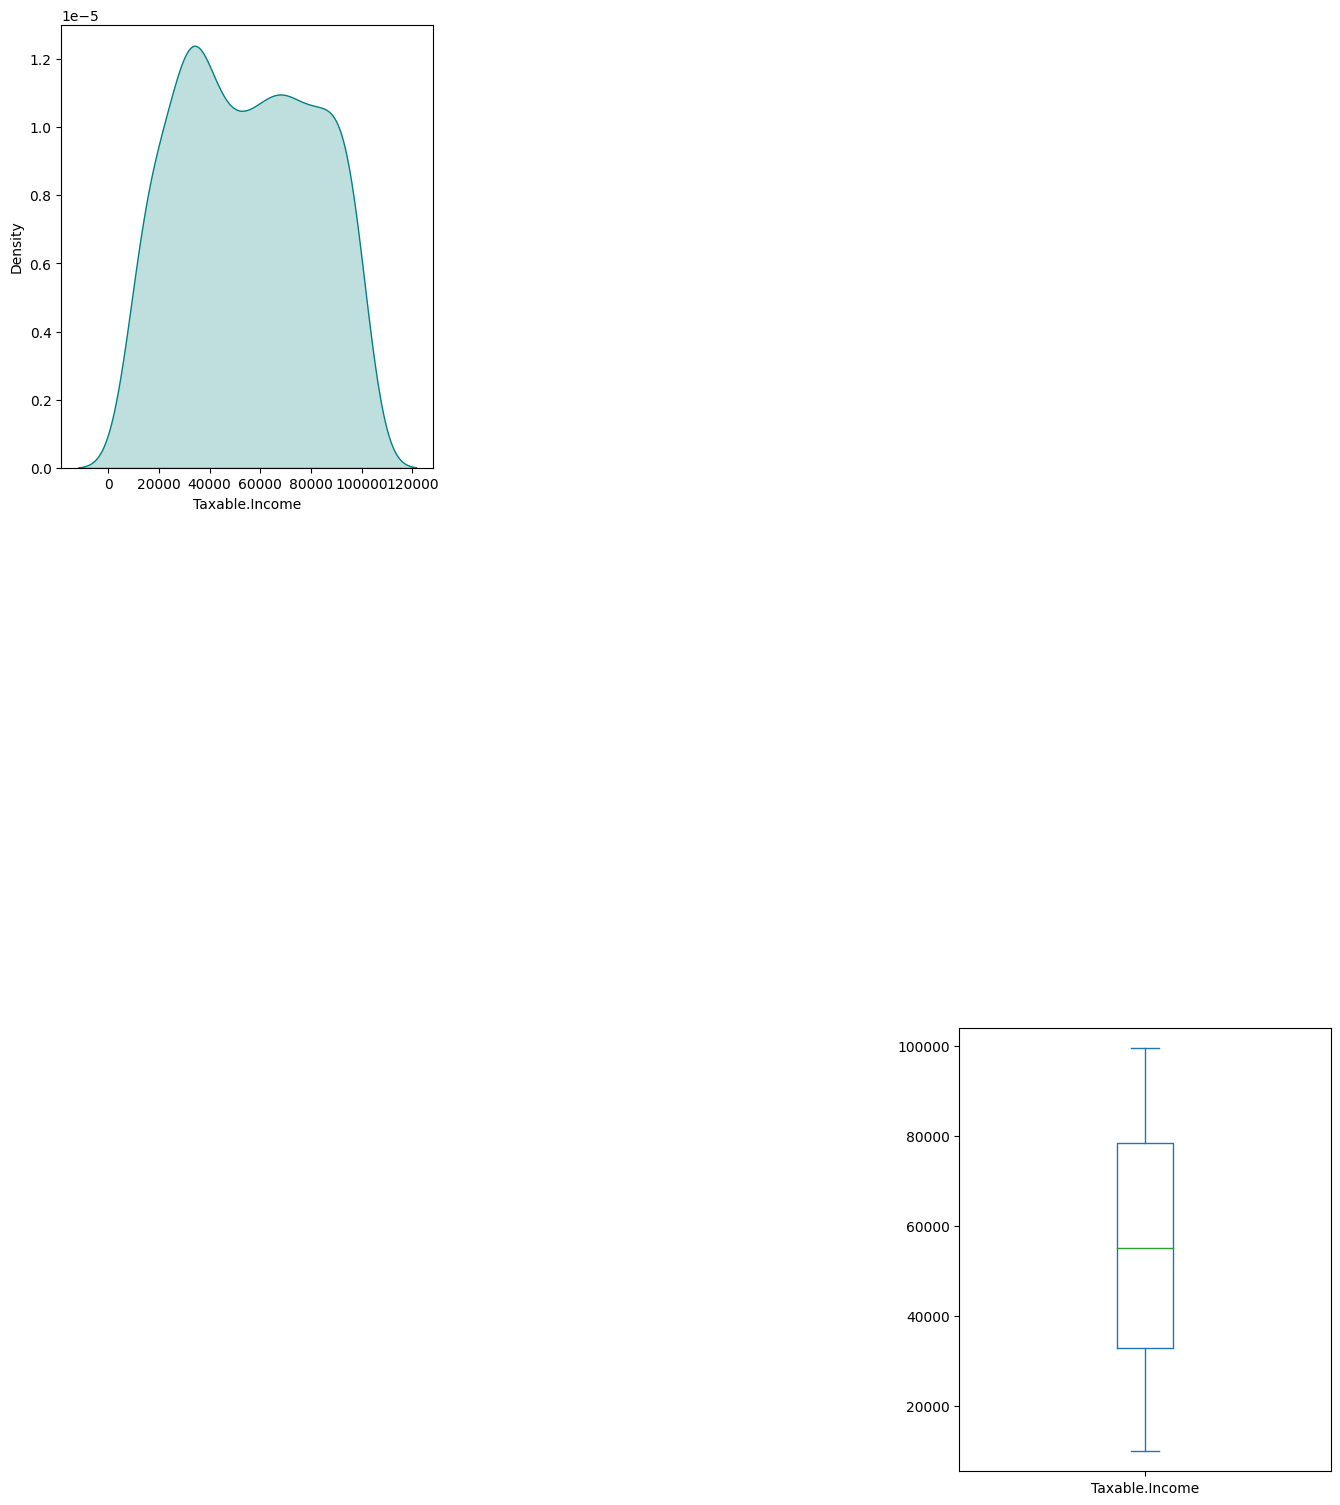

C:\Users\91832\AppData\Local\Temp\ipykernel_17032\2991690886.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fr[col],color='teal',shade=True)


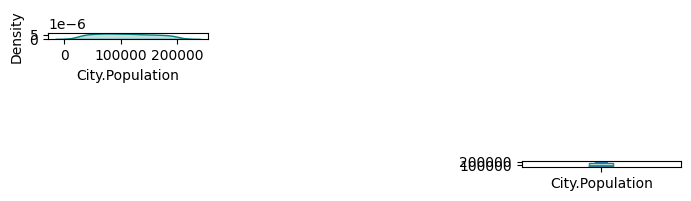

C:\Users\91832\AppData\Local\Temp\ipykernel_17032\2991690886.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fr[col],color='teal',shade=True)


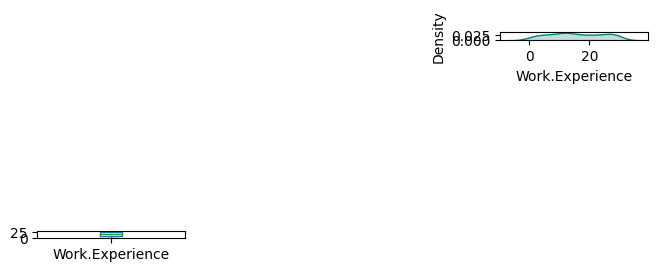

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [59]:
plt.figure(figsize=(18,40))
for i,col in enumerate(ncol,1):
    plt.subplot(8,4,i)
    sns.kdeplot(fr[col],color='teal',shade=True)
    plt.subplot(8,4,i+10)
    fr[col].plot.box()
    plt.tight_layout() 
    plt.show()
    n_data = fr[ncol]
pd.DataFrame(data=[n_data.skew(),n_data.kurtosis()],index=['skewness','kurtosis'])

In [60]:
fr1=pd.get_dummies(fr1,columns=['Undergrad','Marital.Status','Urban'])

In [61]:
corr=fr1.corr()

<AxesSubplot:>

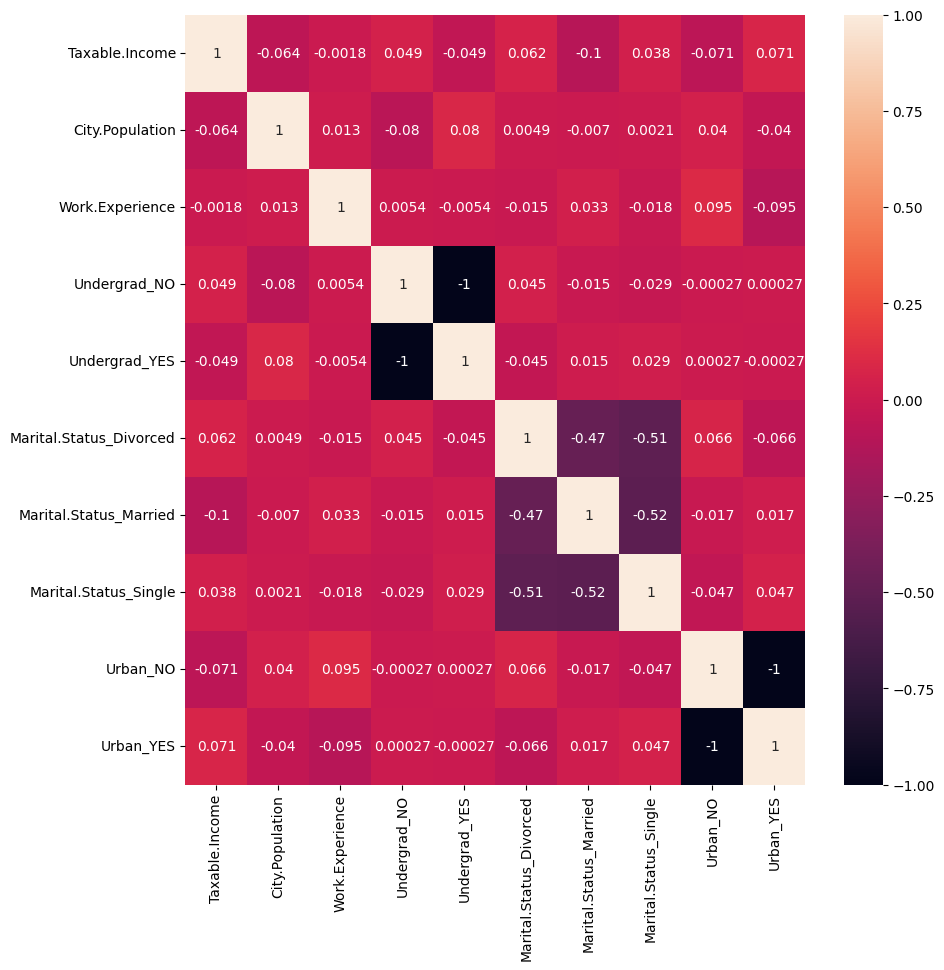

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## Random Forest Model

## Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [63]:
fr1['Taxable.Income']=pd.cut(fr1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [64]:
list(fr1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [65]:
x=fr1.iloc[:,1:10]
y=fr1.iloc[:,0]

In [94]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [95]:
y_train.value_counts()

good     382
risky     98
Name: Taxable.Income, dtype: int64

In [96]:
model1 =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model1.fit(X_train,y_train)
model1.oob_score_

0.7541666666666667

In [97]:
prin=model1.predict(X_train)

In [98]:
accuracy_score(y_train,prin)

1.0

In [99]:
confusion_matrix(y_train,prin)

array([[382,   0],
       [  0,  98]], dtype=int64)

In [100]:
prst=model1.predict(X_test)

In [101]:
accuracy_score(y_test,prst)

0.6833333333333333

In [102]:
confusion_matrix(y_test,prst)

array([[80, 14],
       [24,  2]], dtype=int64)

In [103]:
dft=pd.DataFrame({'Actual':y_test,'Predicted':prst})
dft

,Actual,Predicted
555,good,good
447,good,good
531,good,good
328,good,good
592,good,good
...,...,...
419,good,good
517,risky,good
250,good,good
162,good,risky


In [104]:
co=list(fr1.columns)
co

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [105]:
pre=co[1:10]
tar=co[0]

In [106]:
tr=model1.estimators_[20]

In [107]:
d_data=StringIO()

In [108]:
export_graphviz(tree1, out_file = d_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [109]:
gr = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [110]:
graph.write_png('fraud_full.png')

True

## conclusion:- 
## Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%

## As seen in the confusion matrix of Test data 94 instances are presdected correctly and 26 instances are not

In [111]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [112]:
rf_small.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [113]:
tree_small = rf_small.estimators_[5]


In [114]:
export_graphviz(tree_small, out_file = d_data, feature_names = pre, rounded = True, precision = 1)

In [115]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [116]:
graph.write_png('fraud_small.png')

True

In [117]:
img = mpimg.imread("C:/Users/91832/Desktop/jupyter/assignments/assignment 15 Random Forests/fraud_small.png") 

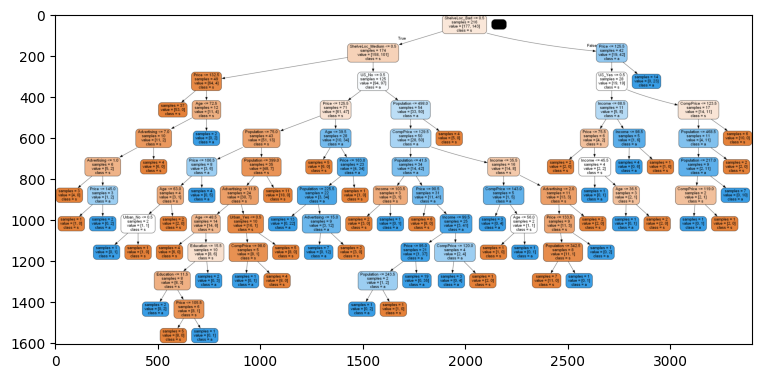

In [118]:
plt.imshow(img)

In [119]:
model1.feature_importances_

array([0.5216135 , 0.35519759, 0.01898609, 0.01681849, 0.01797192,
       0.01798938, 0.01877608, 0.01665352, 0.01599344])

In [122]:
fy = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model1.feature_importances_}).\
                    sort_values('importance', ascending = False)
fy

,feature,importance
0,City.Population,0.521613
1,Work.Experience,0.355198
2,Undergrad_NO,0.018986
6,Marital.Status_Single,0.018776
5,Marital.Status_Married,0.017989
4,Marital.Status_Divorced,0.017972
3,Undergrad_YES,0.016818
7,Urban_NO,0.016654
8,Urban_YES,0.015993


## As seen in the above table city population is most important feature